In [23]:
#Import all pandas and needed dictionaries, etc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from pprint import pprint
import scipy.stats as st
from scipy.stats import linregress
import requests
import matplotlib.patches as mpatches

,Country Name,Country Code,UN Status,Time,Time Code,Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT],Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL],Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT],Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN],Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY],Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT],Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY],Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION],Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC],Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT],Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM]
0,United States,USA,Developed,2015,YR2015,100,100,100,100,5.40839254,568439.0,13.228593,5097931.0,8.716935867,4297048,5.848306e+07
1,United Kingdom,GBR,Developed,2015,YR2015,100,100,100,100,3.017314468,83551.0,24.840050,429157.5,8.711685574,336356,4.926228e+06
2,Belgium,BEL,Developed,2015,YR2015,100,100,100,100,4.741274111,14466.0,20.800023,128345.2,9.201640531,69548,1.394808e+06
3,France,FRA,Developed,2015,YR2015,100,100,100,100,4.101853699,89357.0,15.857667,760300.4,13.49926232,563494,5.632163e+06
4,Germany,DEU,Developed,2015,YR2015,100,100,100,100,3.603094155,187366.0,29.231770,1183042.0,14.2062527,640967,8.327615e+06


In [ ]:
#Import renewable energy usage data and check header 
csv_path = "Source Databases/SAE Energy Output 2015.csv"
data=pd.read_csv(csv_path)
data.head(5)

In [2]:
#Filter Database into the UN status classifications
#country=data["Country Name"]
developed_df=data[data['UN Status'] == 'Developed']
developing_df=data[data['UN Status'] == 'Developing']
transition_df=data[data['UN Status'] == 'Transition']
other_df=data[data['UN Status'] == 'Other']


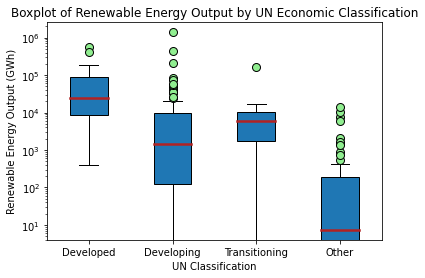

<Figure size 432x288 with 0 Axes>

In [4]:
#Create boxplot of renewable energy output for each UN label

#Collect and create list for each UN qualification and corresponding renewable energy output
renew_output1=developed_df["Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]"].astype(np.float)
renew_output2=developing_df["Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]"].astype(np.float)
renew_output3=transition_df["Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]"].astype(np.float)
renew_output4=other_df["Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]"].astype(np.float)

#Create labels for x axis of box plot
labels=['Developed', 'Developing', 'Transitioning', 'Other']

#define box plot style
flierprops = dict(marker='o', markerfacecolor='lightgreen', markersize=8)
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')

#Create boxplot and insert styles
fig, ax = plt.subplots()
energy_output_boxplot=plt.boxplot([renew_output1, renew_output2, renew_output3, renew_output4], flierprops = flierprops, medianprops = medianprops, patch_artist=True)
plt.xlabel('UN Classification')
plt.ylabel('Renewable Energy Output (GWh)')
plt.title('Boxplot of Renewable Energy Output by UN Economic Classification')
plt.xticks([1, 2, 3, 4], labels)
ax.set_yscale('log')

fig= plt.gcf()
plt.show()
plt.draw()

#Save figure to repo
fig.savefig('renew_energy_boxplot_by_un.png', dpi= 380)

In [ ]:
#Test normality of the box plot data for above plot
st.normaltest(renew_output1)
#st.normaltest(renew_output2)
#st.normaltest(renew_output3)
#st.normaltest(renew_output4)

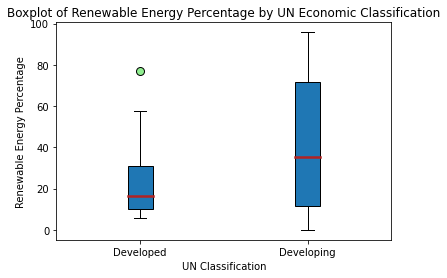

<Figure size 432x288 with 0 Axes>

In [5]:
#Create boxplot of renewable energy percentage of total output for each UN label

#Collect and create list for each UN qualification and corresponding renewable energy output percentage of total output 
renew_per1=developed_df["Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC]"].astype(np.float)
renew_per2=developing_df["Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC]"].astype(np.float)

#Removed after they failed the normality test
#renew_per3=transition_df["Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC]"].astype(np.float)
#renew_per4=other_df["Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC]"].astype(np.float)

#Create labels for x axis
labels=['Developed', 'Developing']

#Define style choices for plot
flierprops = dict(marker='o', markerfacecolor='lightgreen', markersize=8)
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')

#Create boxplot and dictate style choices
fig, ax = plt.subplots()
unrenew_boxplot=plt.boxplot([renew_per1, renew_per2], flierprops = flierprops, medianprops = medianprops, patch_artist=True)
plt.xlabel('UN Classification')
plt.ylabel('Renewable Energy Percentage')
plt.title('Boxplot of Renewable Energy Percentage by UN Economic Classification')
plt.xticks([1, 2], labels)
ax.set_yscale('linear')

fig3= plt.gcf()
plt.show()
plt.draw()

#Save figure to repo
fig3.savefig('renew_energy_percent_boxplot_by_un.png')

In [ ]:
#Test normality of the box plot data for above plot
st.normaltest(renew_per1)
#st.normaltest(renew_per2)
#st.normaltest(renew_per3)
#st.normaltest(renew_per4)


In [ ]:
labels=['Developed', 'Developing', 'Transitioning', 'Other']

flierprops = dict(marker='o', markerfacecolor='lightgreen', markersize=8)
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
fig, ax = plt.subplots()
unrenew_histplot=plt.hist([renew_output1, renew_output2, renew_output3, renew_output4])
plt.xlabel('UN Classification')
plt.ylabel('Renewable Energy Output (GWh)')
plt.title('Boxplot of Renewable Energy Output by UN Economic Classification')
plt.legend('upper right')
ax.set_yscale('log')

plt.show()


In [9]:
#Collect data for the scatter plots of country (EU, USA, and China)

#Open and create DP for GDP data in world
csv_path_gdp = "WorldBankGDP.csv"
data_gdp=pd.read_csv(csv_path_gdp)
#data_gdp.head(5)

#Open and create DP for renewable energy data in world
csv_path_energy = "Source Databases/SAE Energy Output 2015.csv"
data_energy=pd.read_csv(csv_path_energy)
#data_energy.head(5)

#Create filter list for the desired countries
countryList=["DEU","FRA","ITA","SWE","POL","ESP","NLD","GRC","ROU","HRV","DNK","IRL","BGR","BEL","PRT","AUT","CZE","FIN","HUN","LUX",
             "CYP","LTU","SVN","MLT","EST","LVA","SVK","USA","GBR","CHN"]

#Open API of world bank data
results=''
WB_Data=[]
for country in countryList:
    url=f"http://api.worldbank.org/v2/country/{country}/indicator/NY.GDP.MKTP.PP.CD?format=json&date=1990:2019"

    results=requests.get(url).json()
    for entry in results[1]:
        yearDict={"Country Code":entry["countryiso3code"],"Date":entry["date"],"GDP":entry["value"]}
        WB_Data.append(yearDict)
WB_DF=pd.DataFrame(WB_Data)

#Filter world bank data down to the year 2015 which is what our renewable energy data matches
gdp_2015=WB_DF[WB_DF['Date'] == '2015']
#gdp_2015.head(5)

#Merge GDP data with renewable energy data based on Country code
gdp_2015=gdp_2015.merge(data_energy, how='right', on='Country Code')

In [10]:
#Filter any empty data from Database
gdp_2015.dropna(inplace=True)
gdp_2015.head(5)

,Country Code,Date,GDP,Country Name,UN Status,Time,Time Code,Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT],Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL],Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT],Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN],Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY],Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT],Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY],Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION],Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC],Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT],Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM]
0,DEU,2015,3.895127e+12,Germany,Developed,2015,YR2015,100,100,100,100,3.603094155,187366.0,29.231770,1183042.000,14.2062527,640967,8.327615e+06
1,FRA,2015,2.719223e+12,France,Developed,2015,YR2015,100,100,100,100,4.101853699,89357.0,15.857667,760300.400,13.49926232,563494,5.632163e+06
2,ITA,2015,2.241525e+12,Italy,Developed,2015,YR2015,100,100,100,100,3.072198971,108906.0,38.679225,778697.100,16.51685058,281562,4.714562e+06
3,SWE,2015,4.812998e+11,Sweden,Developed,2015,YR2015,100,100,100,100,4.269061194,102442.0,63.262748,679811.900,53.2477698,161931,1.276696e+06
4,POL,2015,1.020174e+12,Poland,Developed,2015,YR2015,100,100,100,100,4.135685203,22683.0,13.802399,302285.700,11.91148821,164341,2.537766e+06
5,ESP,2015,1.621504e+12,Spain,Developed,2015,YR2015,100,100,100,100,3.327359042,97088.0,34.949891,513540.800,16.25409774,277792,3.159454e+06
6,NLD,2015,8.521132e+11,Netherlands,Developed,2015,YR2015,100,100,100,100,3.936630335,13695.0,12.442082,107380.200,5.889463079,110070,1.823260e+06
7,GRC,2015,2.911091e+11,Greece,Developed,2015,YR2015,94.31,100,100,100,3.72312235,14850.0,28.655783,112744.200,17.17004755,51822,6.566330e+05
8,ROU,2015,4.286415e+11,Romania,Developed,2015,YR2015,85.33,100,100,100,3.52,26202.0,39.746974,211769.100,23.69779403,65922,8.936237e+05
9,HRV,2015,9.673963e+10,Croatia,Developed,2015,YR2015,92.28,100,100,100,4.053076043,7510.0,66.826838,89589.790,33.12746664,11238,2.704396e+05


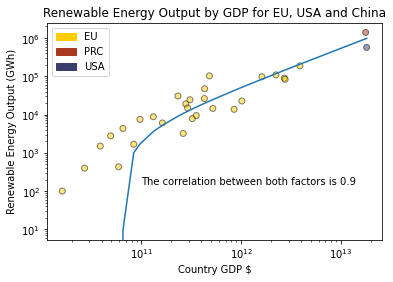

<Figure size 432x288 with 0 Axes>

In [27]:
#Create scatter plot of GDP v Renewable total energy output

#Sort data by GDP and RE output
gdp_2015=gdp_2015.sort_values(["GDP", "Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]"])

#Create list of GDP data and RE output for plotting
gdp_data=gdp_2015['GDP'].astype(float)
renew_data_scatter=gdp_2015["Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]"].astype(float)

#Create scatter plot of GDP v RE total output
fig, ax = plt.subplots()

#Define colors to identify the 3 groups 
colors=['#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00',
        '#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00',
        '#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00',
        '#FFCC00','#aa381e','#3b3c6e']

#Plot data
plt.scatter(gdp_data,renew_data_scatter, c= colors, alpha=.5, edgecolor='black')
plt.xlabel('Country GDP $')
plt.ylabel('Renewable Energy Output (GWh)')
plt.title('Renewable Energy Output by GDP for EU, USA and China')

#adjust scales
ax.set_yscale('log')
ax.set_xscale('log')

#Label the countries for the legend
handles, labels = ax.get_legend_handles_labels()
labels=['EU','EU','EU','EU','EU','EU','EU','EU','EU','EU','EU','EU','EU','EU','EU','EU','EU','EU','EU',
       'EU','EU','EU','EU','EU','EU','EU','EU','EU','PRC','USA']

#Create patch to match the above labels
eu_patch = mpatches.Patch(color='#FFCC00', label='EU')
prc_patch = mpatches.Patch(color='#aa381e', label='PRC')
usa_patch = mpatches.Patch(color='#3b3c6e', label='USA')

#Add legend to the plot
plt.legend(handles=[eu_patch, prc_patch, usa_patch])

#Add regression to the data
slope, intercept, rvalue, pvalue, stderr = linregress(gdp_data, renew_data_scatter)
regress_values = gdp_data * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot regression line 
reg_plot = plt.plot(gdp_data, regress_values)

#Check correlation of the data
correlation = st.pearsonr(gdp_data, renew_data_scatter)
#print(f"The correlation between both factors is {round(correlation[0],2)}")
ax.text(10e10,15e1 , f"The correlation between both factors is {round(correlation[0],2)}", fontsize=10)

#Plot final scatter and regression
fig2=plt.gcf()
plt.show()
plt.draw()

#Save figure to repo
fig2.savefig('Renew_Energy_v_GDP_Scatter_Plot.png', dpi = 480)

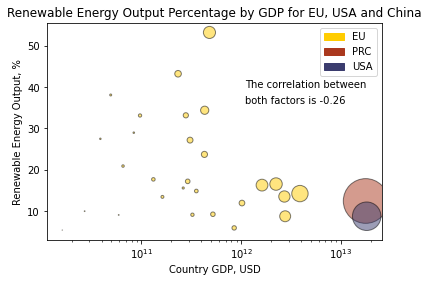

<Figure size 432x288 with 0 Axes>

In [40]:
#Create scatter plot of GDP v Renewable total energy output

#Sort data by RE output % of total 
gdp_2015=gdp_2015.sort_values(["GDP", "Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC]"])

#Create list of GDP data and RE output % for plotting
gdp_data=gdp_2015['GDP'].astype(float) #Duplicate of previous calc but added here to make sure this section runs
renew_data_per=gdp_2015["Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC]"].astype(float)
renew_data_scatter_norm=renew_data_scatter/(max(renew_data_scatter)*.0005)

#Begin plotting of scatter plot
fig, ax = plt.subplots()

#Define colors to identify the 3 groups
colors=['#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00',
        '#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00',
        '#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00',
        '#FFCC00','#aa381e','#3b3c6e']

#Plot GDP v RE output %
plt.scatter(gdp_data,renew_data_per, s=renew_data_scatter_norm, c=colors, alpha=.5, edgecolor='black')

#Set style of plot
plt.xlabel('Country GDP, USD')
plt.ylabel('Renewable Energy Output, %')
plt.title('Renewable Energy Output Percentage by GDP for EU, USA and China')

#Adjust scale of x and y axis to make most sense
ax.set_yscale('linear')
ax.set_xscale('log')

#Define the individual points for use in legend
handles, labels = ax.get_legend_handles_labels()
labels=['EU','EU','EU','EU','EU','EU','EU','EU','EU','EU','EU','EU','EU','EU','EU','EU','EU','EU','EU',
       'EU','EU','EU','EU','EU','EU','EU','EU','EU','PRC','USA']

#Create 3 labels for the legend and plot
eu_patch = mpatches.Patch(color='#FFCC00', label='EU')
prc_patch = mpatches.Patch(color='#aa381e', label='PRC')
usa_patch = mpatches.Patch(color='#3b3c6e', label='USA')
plt.legend(handles=[eu_patch, prc_patch, usa_patch])

#Check correlation (bad) and add to plot
correlation = st.pearsonr(gdp_data, renew_data_per)
ax.text(11e11,40 , f"The correlation between", fontsize=10)
ax.text(11e11,36 , f"both factors is {round(correlation[0],2)}", fontsize=10)

#Plot final figure and save to repo
fig1=plt.gcf()
plt.show()
plt.draw()
fig1.savefig('Renew_Energy_%_v_GDP_Scatter_Plot.png', dpi = 480)